In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%load_ext autoreload
%autoreload 2

In [2]:
from bokeh.sampledata.autompg import autompg as df
t = Table.from_df(df)

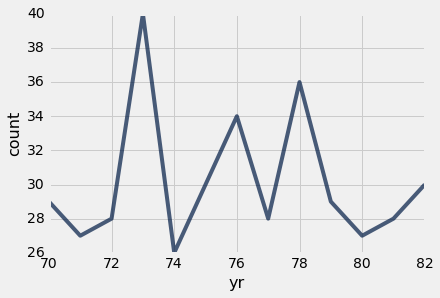

In [3]:
t.group('yr').plot('yr')

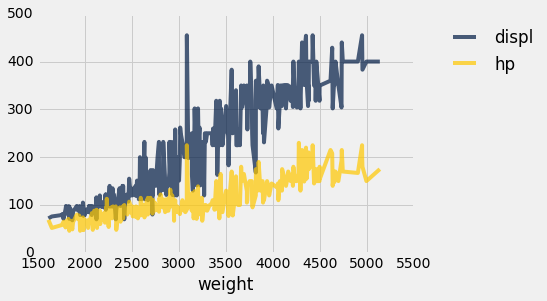

In [4]:
t.plot('weight', ['displ', 'hp'])

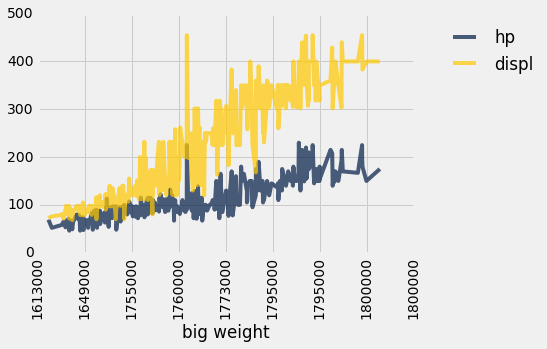

In [5]:
t.with_column('big weight', t['weight'] * 1000).plot('big weight', ['hp', 'displ'])

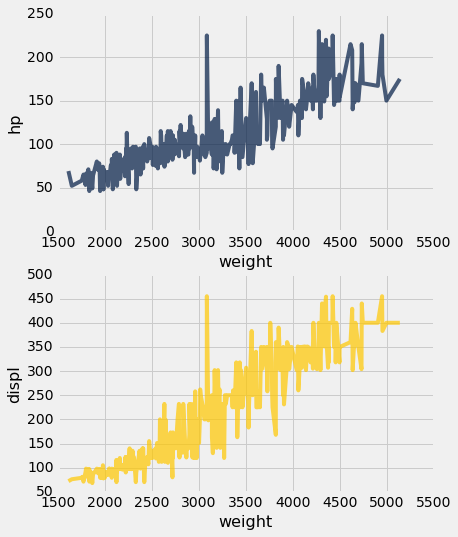

In [6]:
t.plot('weight', ['hp', 'displ'], overlay=False)

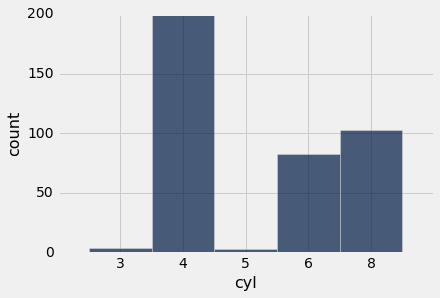

In [7]:
t.group('cyl').bar('cyl')

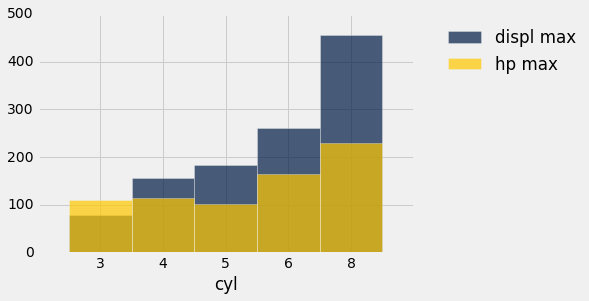

In [8]:
t.select(['cyl', 'displ', 'hp']).group('cyl', max).bar('cyl')

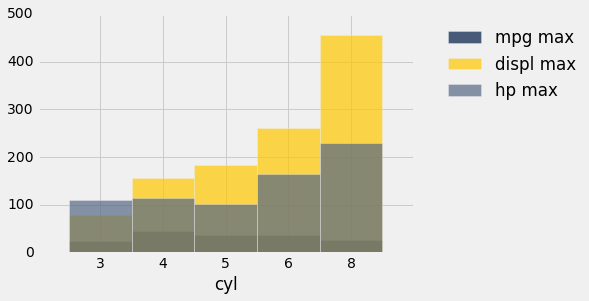

In [9]:
t.group('cyl', max).bar('cyl', [1, 2, 3])

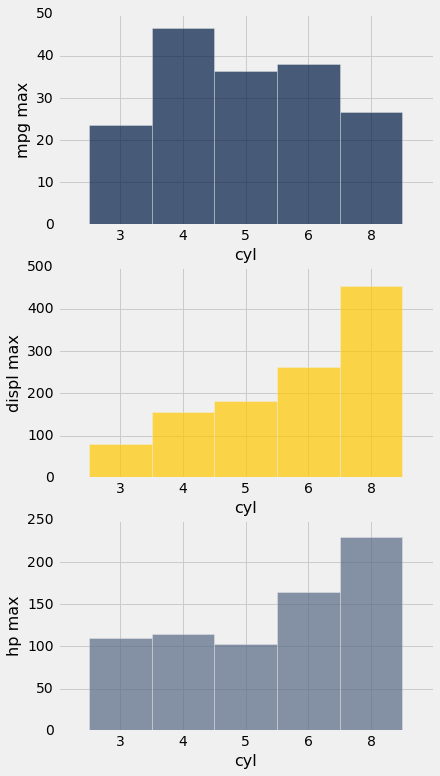

In [10]:
t.group('cyl', max).bar('cyl', [1, 2, 3], overlay=False)

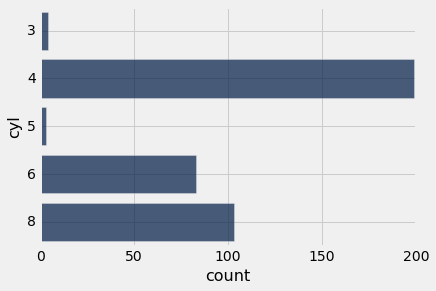

In [11]:
t.group('cyl').barh('cyl')

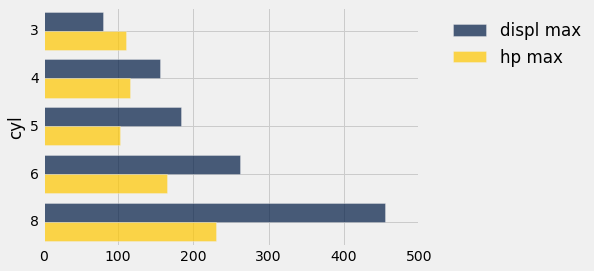

In [12]:
t.select(['cyl', 'displ', 'hp']).group('cyl', max).barh('cyl')

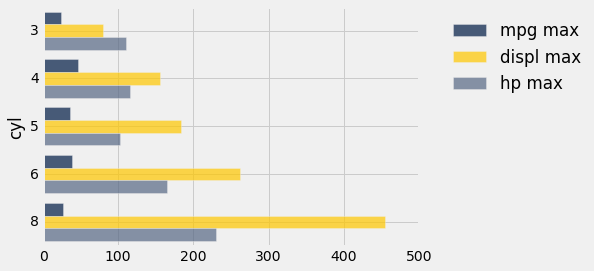

In [13]:
t.group('cyl', max).barh('cyl', [1, 2, 3])

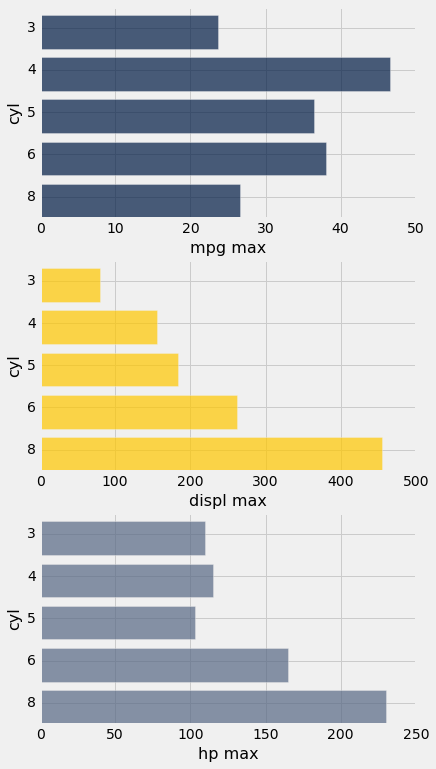

In [14]:
t.group('cyl', max).barh('cyl', [1, 2, 3], overlay=False)

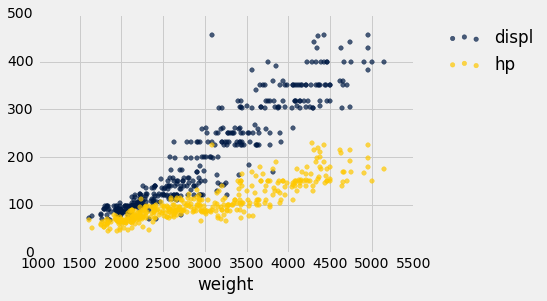

In [15]:
t.select(['weight', 'displ', 'hp']).scatter('weight')

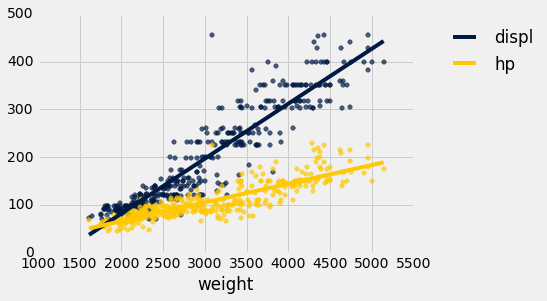

In [16]:
t.select(['weight', 'displ', 'hp']).scatter('weight', fit_line=True)

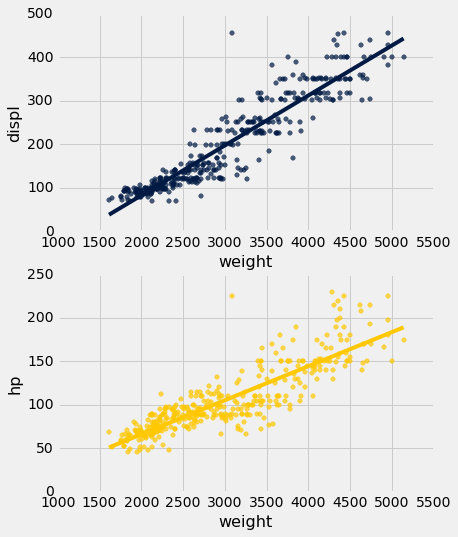

In [17]:
t.select(['weight', 'displ', 'hp']).scatter('weight', fit_line=True, overlay=False)

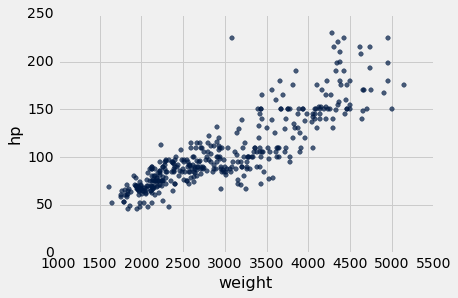

In [18]:
t.scatter('weight', 'hp')

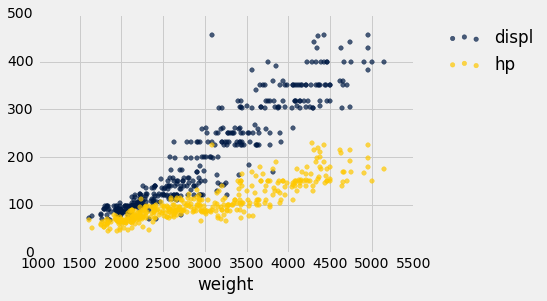

In [19]:
t.scatter('weight', [2, 3])

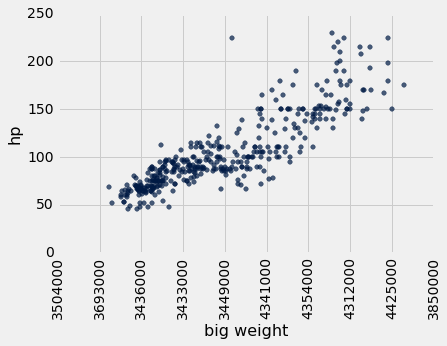

In [20]:
t.with_column('big weight', t['weight'] * 1000).scatter('big weight', 'hp')

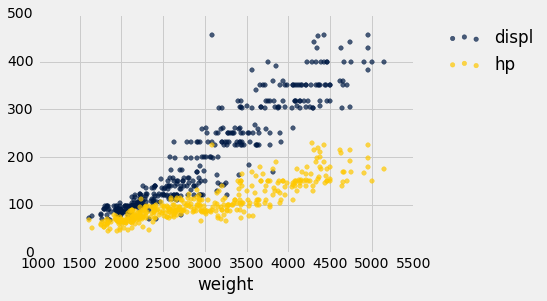

In [21]:
t.scatter('weight', ['displ', 'hp'])

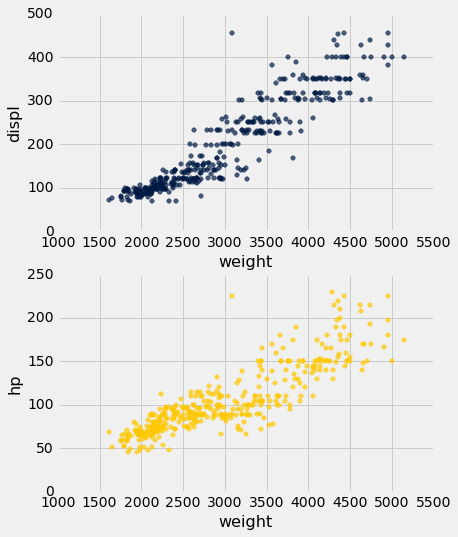

In [22]:
t.scatter('weight', ['displ', 'hp'], overlay=False)

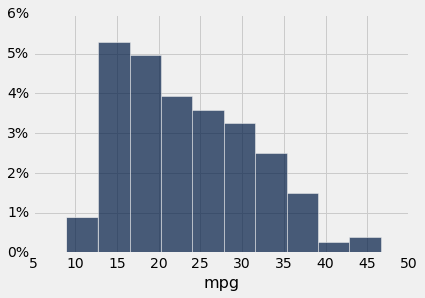

In [23]:
t.hist('mpg')

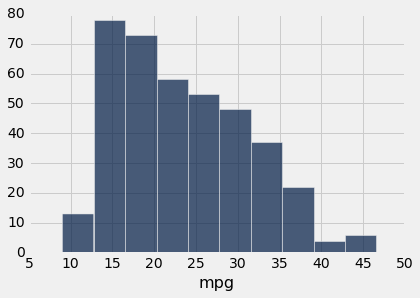

In [24]:
f = t.hist('mpg', normed=False)

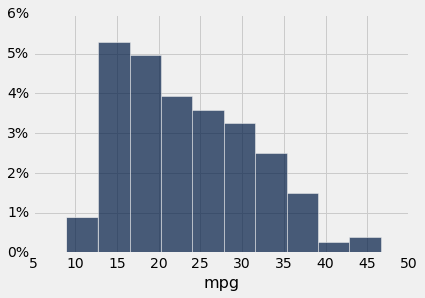

In [25]:
t.hist('mpg', overlay=False)

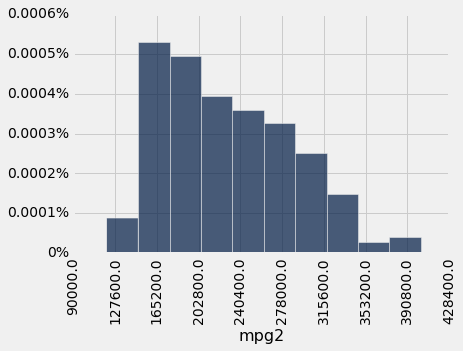

In [26]:
f = t.with_column('mpg2', t['mpg'] * 10000).hist('mpg2')

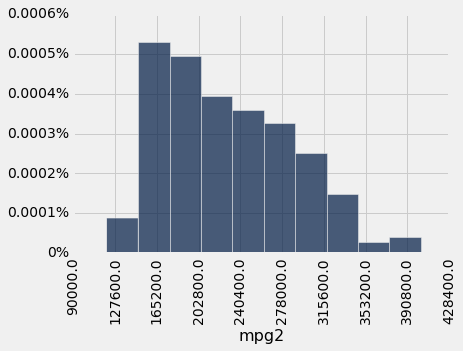

In [27]:
f = t.with_column('mpg2', t['mpg'] * 10000).hist('mpg2', overlay=False)

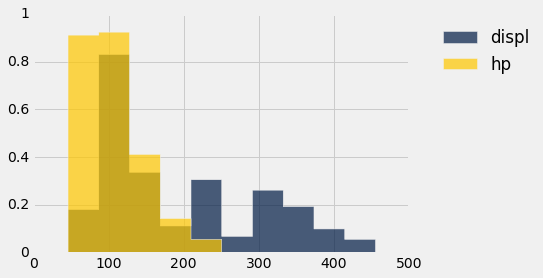

In [33]:
t.hist(['displ', 'hp'])

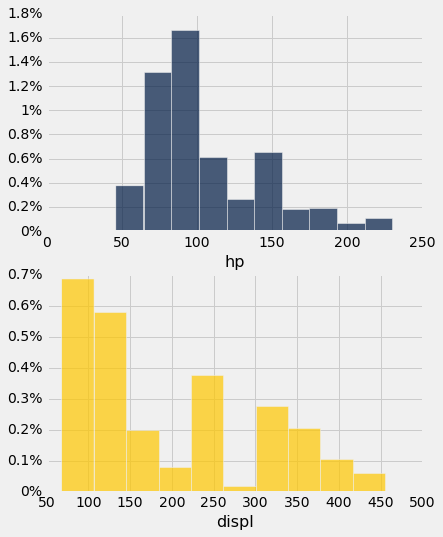

In [29]:
t.hist(['displ', 'hp'], overlay=False)